## **Exploratory Data Analysis & Visualization**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean

### **Orders Data**

#### **Import and prepare data**

In [2]:
order_data = pd.read_csv('orders_comp (1).csv')
order_data.head()

,order_id,sku,qty,unit_price,total_price,price,name,order_date,brand,desc,in_stock,price_diff,disc_perc,category,subcategory
0,299545,OWC0100,1,47.49,47.49,60.99,OWC In-line Digital Temperature Sensor Kit HDD...,01/01/2017 01:51,OWC,Kit temperature sensor for HDD iMac 21 inch an...,1,13.50,22.134776,other,other
1,299546,IOT0014,1,18.99,18.99,22.95,iOttie Easy View 2 Car Black Support,01/01/2017 01:57,iOttie,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,0,3.96,17.254902,other,other
2,295347,APP0700,1,72.19,72.19,89.00,Apple 85W MagSafe 2 charger MacBook Pro screen...,01/01/2017 02:02,Apple,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,1,16.81,18.887640,macbooks,other
3,299549,PAC0929,1,2565.99,2565.99,3209.00,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",02/01/2017 10:00,Pack,IMac desktop computer 27 inch Retina 5K RAM 32...,0,643.01,20.037706,other,other
4,299556,CRU0039-A,1,60.90,60.90,76.99,(Open) Crucial 240GB SSD 7mm BX200,01/01/2017 02:30,Crucial,SSD hard drive and high-speed performance with...,0,16.09,20.898818,other,other


#### **Initial Coarse Data Exploration**

In [3]:
order_data.dtypes

order_id         int64
sku             object
qty              int64
unit_price     float64
total_price    float64
price          float64
name            object
order_date      object
brand           object
desc            object
in_stock         int64
price_diff     float64
disc_perc      float64
category        object
subcategory     object
dtype: object

In [4]:
# Inspect orders
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61322 entries, 0 to 61321
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   order_id     61322 non-null  int64  
 1   sku          61322 non-null  object 
 2   qty          61322 non-null  int64  
 3   unit_price   61322 non-null  float64
 4   total_price  61322 non-null  float64
 5   price        61322 non-null  float64
 6   name         61322 non-null  object 
 7   order_date   61322 non-null  object 
 8   brand        61322 non-null  object 
 9   desc         61322 non-null  object 
 10  in_stock     61322 non-null  int64  
 11  price_diff   61322 non-null  float64
 12  disc_perc    61322 non-null  float64
 13  category     61322 non-null  object 
 14  subcategory  61322 non-null  object 
dtypes: float64(5), int64(3), object(7)
memory usage: 7.0+ MB


In [5]:
sum(order_data.qty)

68705

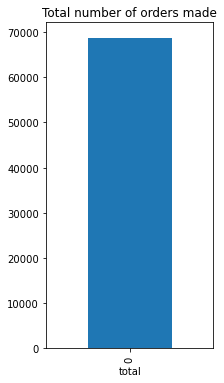

In [6]:
# Total number of orders made
pd.Series([sum(order_data.qty)]).plot(kind='bar', xlabel='total', title='Total number of orders made', figsize=(3,6))
plt.show();

In [7]:
# Total number of orders in stock
order_data.in_stock.value_counts()

1    34613
0    26709
Name: in_stock, dtype: int64

In [8]:
# Total Promo Sales revenue
(order_data.qty * order_data.unit_price * order_data.in_stock).sum()

6235951.699999999

In [9]:
# Total actual discount on orders
(order_data.price_diff * order_data.qty* order_data.in_stock).sum()

935243.7314200001

In [10]:
# what percentage of the sales revenue is the discount?
(935243.7314200001/6235951.699999999)*100

14.997610251214747

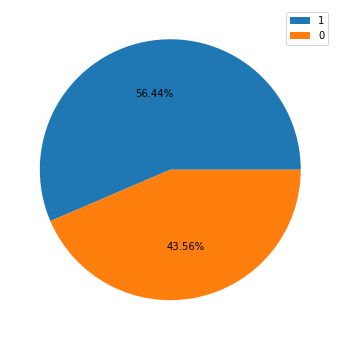

In [11]:
# Visualize the percentages of in_stock and out_of_stock products
plt.figure(figsize=(8, 6))
plt.pie(order_data.in_stock.value_counts(), autopct='%0.2f%%')
plt.legend(order_data.in_stock.value_counts().index)
plt.show();

In [12]:
prdt_categ = pd.read_csv('orders_final.csv')
prdt_categ.head()

,order_id,sku,qty,unit_price,total_price,price,name,order_date,brand,desc,in_stock,price_diff,disc_perc,category,subcategory
0,299545,OWC0100,1,47.49,47.49,60.99,OWC In-line Digital Temperature Sensor Kit HDD...,01/01/2017 01:51,OWC,Kit temperature sensor for HDD iMac 21 inch an...,1,13.50,22.134776,accessories,computer_parts
1,299546,IOT0014,1,18.99,18.99,22.95,iOttie Easy View 2 Car Black Support,01/01/2017 01:57,iOttie,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,0,3.96,17.254902,accessories,iphone_support
2,295347,APP0700,1,72.19,72.19,89.00,Apple 85W MagSafe 2 charger MacBook Pro screen...,01/01/2017 02:02,Apple,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,1,16.81,18.887640,accessories,apple_macbook_charging
3,299549,PAC0929,1,2565.99,2565.99,3209.00,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",02/01/2017 10:00,Pack,IMac desktop computer 27 inch Retina 5K RAM 32...,0,643.01,20.037706,devices,apple_macbooks
4,299556,CRU0039-A,1,60.90,60.90,76.99,(Open) Crucial 240GB SSD 7mm BX200,01/01/2017 02:30,Crucial,SSD hard drive and high-speed performance with...,0,16.09,20.898818,accessories,computer_parts_memory


In [13]:
prdt_categ.category.replace(to_replace='spare-parts', value='spare_parts', inplace=True)

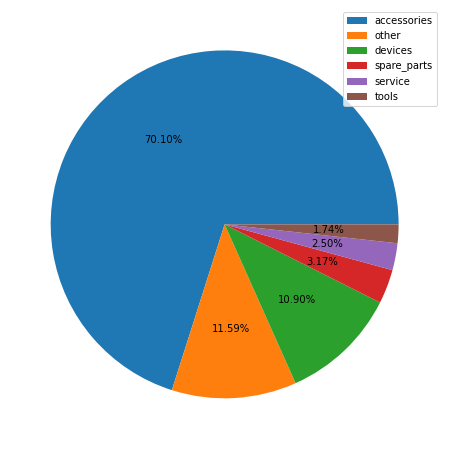

In [14]:
# what category of products had the most orders
plt.figure(figsize=(10,8))
plt.pie(prdt_categ.groupby('category').qty.sum().sort_values(ascending=False), autopct='%0.2f%%')
plt.legend(prdt_categ.groupby('category').qty.sum().sort_values(ascending=False).index, loc='best')
plt.show()

In [15]:
# How does the quantity of products ordered compare to what is available in stock across categories?
compare_categories = (prdt_categ.groupby('category')
                                .qty.sum().to_frame(name='ordered')
                                .join(prdt_categ[prdt_categ.in_stock == 1].groupby('category')
                                                                          .qty.sum().to_frame(name='in_stock'), how='inner')
                     )

compare_categories

,ordered,in_stock
category,,
accessories,48159,29025
devices,7489,2747
other,7964,3835
service,1721,1450
spare_parts,2179,1689
tools,1193,906


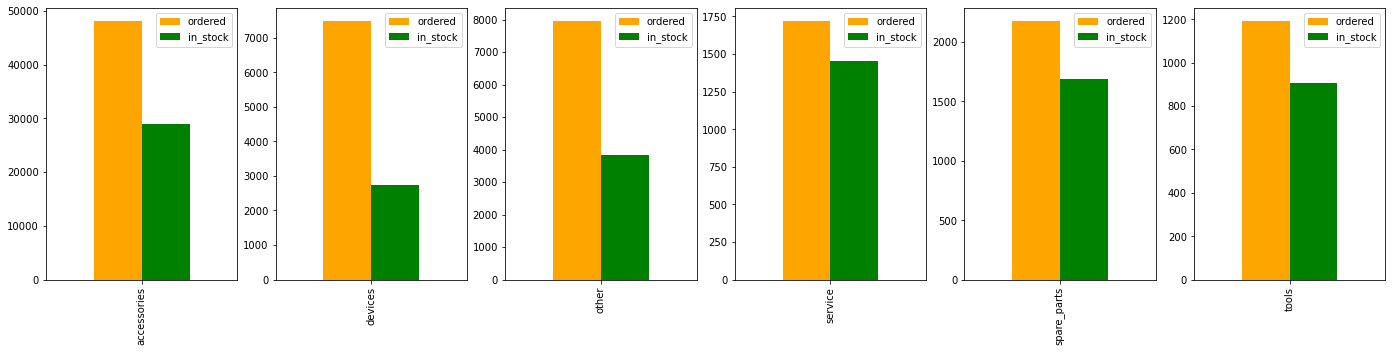

In [48]:
fig, ax = plt.subplots(1, 6)
for x in range(len(compare_categories)):
    compare_categories.iloc[x].to_frame().T.plot(kind='bar', ax=ax[x], color=['orange', 'green'], figsize=(24,5))

plt.show();

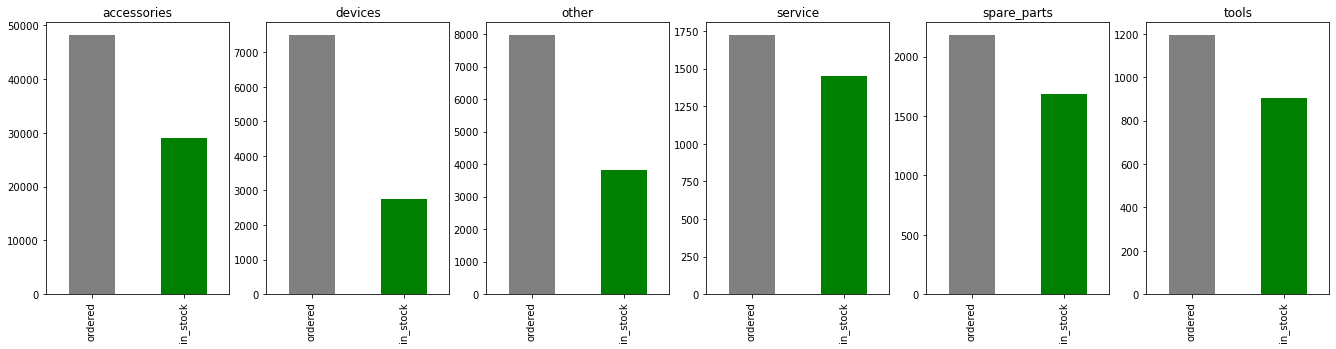

In [50]:
fig, ax = plt.subplots(1, 6)
for x in range(len(compare_categories)):
    table = compare_categories.iloc[x]
    table.plot.bar(x=table.values, ax=ax[x], title=table.name, color=['gray', 'green'], figsize=(23,5))

plt.show();

    Product categories accessories, devices, and other demand is not well served

### **A Detailed look at the Revenue Based on Time Period**

In [18]:
# Convert order_date to datetime objects and set as index.
orders_data = prdt_categ.copy() 
orders_data['date'] = pd.to_datetime(orders_data.order_date, format='%d/%m/%Y %H:%M')
orders_data.set_index('date', inplace=True)
orders_data.head()

,order_id,sku,qty,unit_price,total_price,price,name,order_date,brand,desc,in_stock,price_diff,disc_perc,category,subcategory
date,,,,,,,,,,,,,,,
2017-01-01 01:51:00,299545,OWC0100,1,47.49,47.49,60.99,OWC In-line Digital Temperature Sensor Kit HDD...,01/01/2017 01:51,OWC,Kit temperature sensor for HDD iMac 21 inch an...,1,13.50,22.134776,accessories,computer_parts
2017-01-01 01:57:00,299546,IOT0014,1,18.99,18.99,22.95,iOttie Easy View 2 Car Black Support,01/01/2017 01:57,iOttie,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,0,3.96,17.254902,accessories,iphone_support
2017-01-01 02:02:00,295347,APP0700,1,72.19,72.19,89.00,Apple 85W MagSafe 2 charger MacBook Pro screen...,01/01/2017 02:02,Apple,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,1,16.81,18.887640,accessories,apple_macbook_charging
2017-01-02 10:00:00,299549,PAC0929,1,2565.99,2565.99,3209.00,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",02/01/2017 10:00,Pack,IMac desktop computer 27 inch Retina 5K RAM 32...,0,643.01,20.037706,devices,apple_macbooks
2017-01-01 02:30:00,299556,CRU0039-A,1,60.90,60.90,76.99,(Open) Crucial 240GB SSD 7mm BX200,01/01/2017 02:30,Crucial,SSD hard drive and high-speed performance with...,0,16.09,20.898818,accessories,computer_parts_memory


In [19]:
orders_data.dtypes

order_id         int64
sku             object
qty              int64
unit_price     float64
total_price    float64
price          float64
name            object
order_date      object
brand           object
desc            object
in_stock         int64
price_diff     float64
disc_perc      float64
category        object
subcategory     object
dtype: object

In [20]:
# How many years of sale are in the record.
yrs = list(set(orders_data.index.year))
yrs

[2017, 2018]

In [21]:
# quantity of product ordered per year
year_ordered = orders_data.groupby([orders_data.index.year]).qty.sum().to_frame()
year_ordered.columns = ['ordered']
year_ordered

,ordered
date,
2017,54064
2018,14641


In [22]:
# quantity of product sold per year
year_in_stock = orders_data[orders_data.in_stock == 1]
year_in_stock = year_in_stock.groupby(year_in_stock.index.year).qty.sum().to_frame()
year_in_stock.columns = ['in_stock']
year_in_stock

,in_stock
date,
2017,29531
2018,10121


<Figure size 432x288 with 0 Axes>

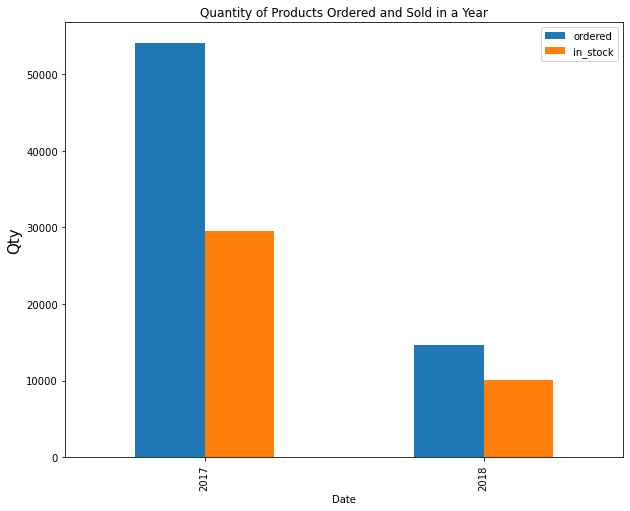

In [23]:
# visualize above quantities
plt.figure()
year_ordered.merge(year_in_stock, left_index=True, right_index=True)\
                   .plot.bar(figsize=(10,8), xlabel='Date',\
                        title='Quantity of Products Ordered and Sold in a Year')

plt.ylabel('Qty', fontsize=15)
plt.show();

In [24]:
# quantity of products ordered per month.
ordered = orders_data.groupby([orders_data.index.year,\
                               orders_data.index.month])\
                               .qty.sum().to_frame()

ordered.sample(5)

qty
date date      
2017 2     3310
     9     3218
     3      303
     7     5168
2018 3     2153

In [25]:
# quantity of products sold per month.
orders_instock = orders_data[orders_data.in_stock == 1]
orders_instock = orders_instock.groupby([orders_instock.index.year, orders_instock.index.month]).qty.sum().to_frame()
orders_instock.sample(5)

qty
date date      
2018 3     1523
2017 5     1394
     6     1170
2018 2     3280
2017 12    4875

<Figure size 432x288 with 0 Axes>

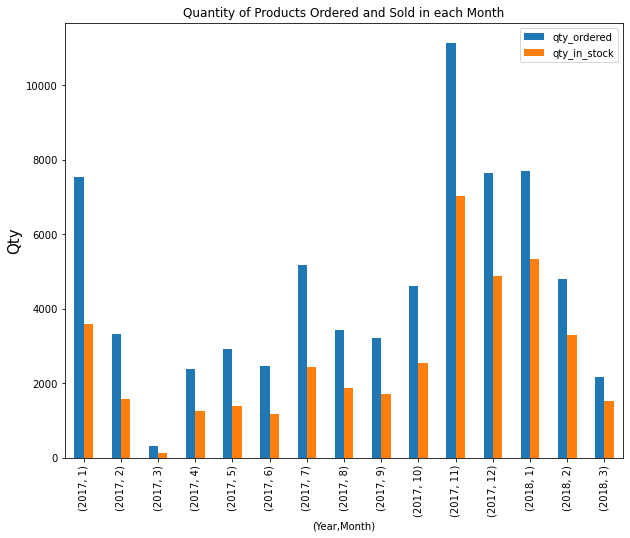

In [26]:
plt.figure()
ordered.merge(orders_instock, left_index=True,\
              right_index=True, suffixes=('_ordered', '_in_stock'))\
              .plot.bar(figsize=(10,8), xlabel='(Year,Month)',\
                        title='Quantity of Products Ordered and Sold in each Month')

plt.ylabel('Qty', fontsize=15)
plt.show();

    Across every month, the orders are not well served, therefore sale is not maximized.

#### **Create Categories for the Prices**

   ##### **product price category description**
    
    expensive: 1000 - 4999; exp
    
    moderately expensive: 500 - 999; m_exp

    affordable: 150 - 499; aff
    
    cheap: 20 - 149; cheap
    
    very cheap: 0 - 19; v_cheap

In [27]:
orders_data.head(3)

,order_id,sku,qty,unit_price,total_price,price,name,order_date,brand,desc,in_stock,price_diff,disc_perc,category,subcategory
date,,,,,,,,,,,,,,,
2017-01-01 01:51:00,299545,OWC0100,1,47.49,47.49,60.99,OWC In-line Digital Temperature Sensor Kit HDD...,01/01/2017 01:51,OWC,Kit temperature sensor for HDD iMac 21 inch an...,1,13.50,22.134776,accessories,computer_parts
2017-01-01 01:57:00,299546,IOT0014,1,18.99,18.99,22.95,iOttie Easy View 2 Car Black Support,01/01/2017 01:57,iOttie,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,0,3.96,17.254902,accessories,iphone_support
2017-01-01 02:02:00,295347,APP0700,1,72.19,72.19,89.00,Apple 85W MagSafe 2 charger MacBook Pro screen...,01/01/2017 02:02,Apple,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,1,16.81,18.887640,accessories,apple_macbook_charging


In [28]:
orders_data['price_categ'] = pd.cut(orders_data['price'], bins=[0, 20, 150, 500, 1000, 10000], \
                                    labels=['v_cheap', 'cheap', 'aff', 'm_exp', 'exp'], right=False)
orders_data.head(3)

,order_id,sku,qty,unit_price,total_price,price,name,order_date,brand,desc,in_stock,price_diff,disc_perc,category,subcategory,price_categ
date,,,,,,,,,,,,,,,,
2017-01-01 01:51:00,299545,OWC0100,1,47.49,47.49,60.99,OWC In-line Digital Temperature Sensor Kit HDD...,01/01/2017 01:51,OWC,Kit temperature sensor for HDD iMac 21 inch an...,1,13.50,22.134776,accessories,computer_parts,cheap
2017-01-01 01:57:00,299546,IOT0014,1,18.99,18.99,22.95,iOttie Easy View 2 Car Black Support,01/01/2017 01:57,iOttie,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,0,3.96,17.254902,accessories,iphone_support,cheap
2017-01-01 02:02:00,295347,APP0700,1,72.19,72.19,89.00,Apple 85W MagSafe 2 charger MacBook Pro screen...,01/01/2017 02:02,Apple,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,1,16.81,18.887640,accessories,apple_macbook_charging,cheap


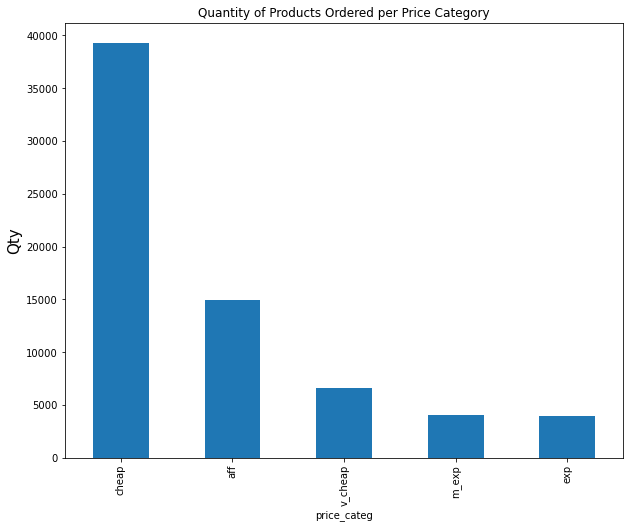

In [29]:
# What price category is ordered the most?
orders_data.groupby(['price_categ'])\
           .qty.sum().sort_values(ascending=False)\
           .plot.bar(figsize=(10,8), title='Quantity of Products Ordered per Price Category')

plt.ylabel('Qty', fontsize=15)
plt.show();

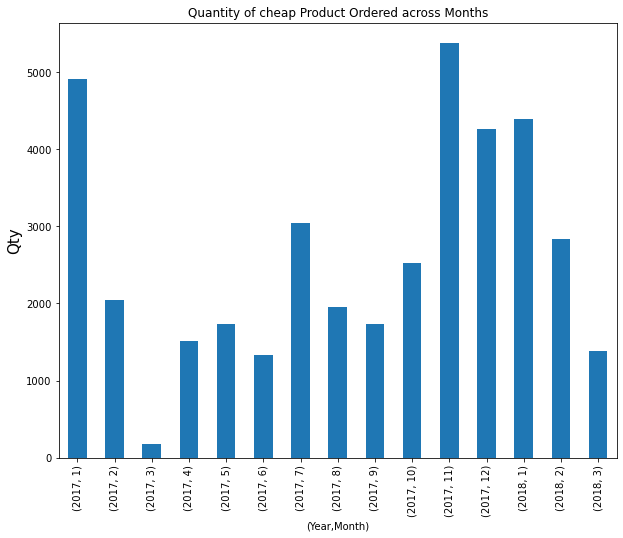

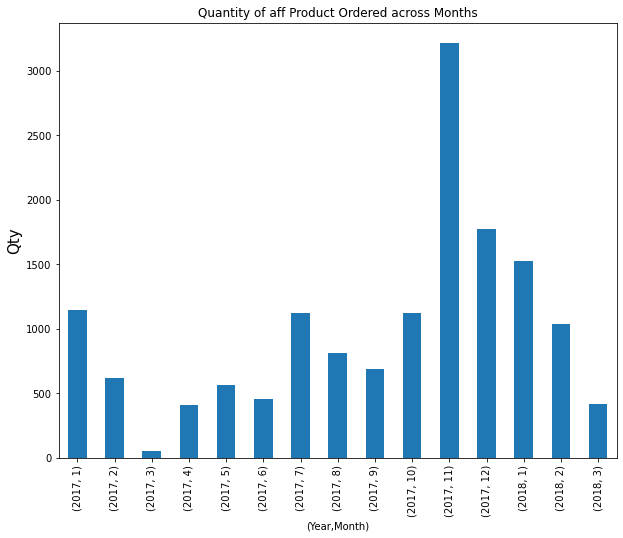

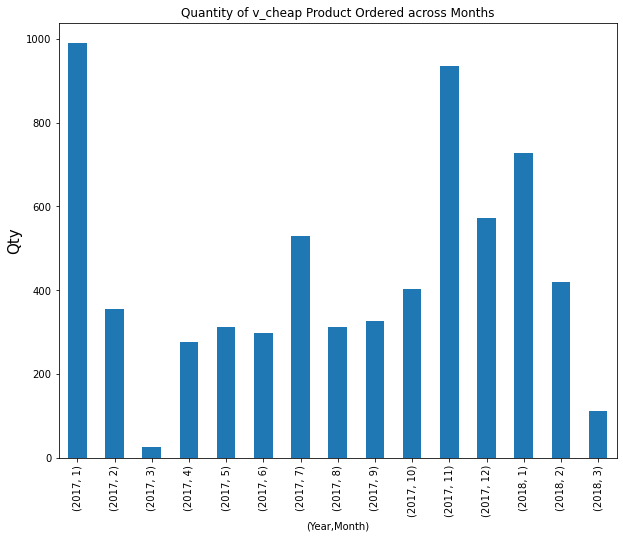

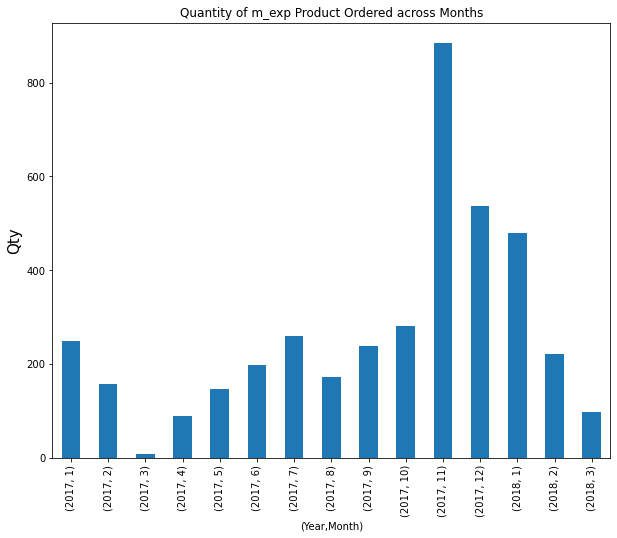

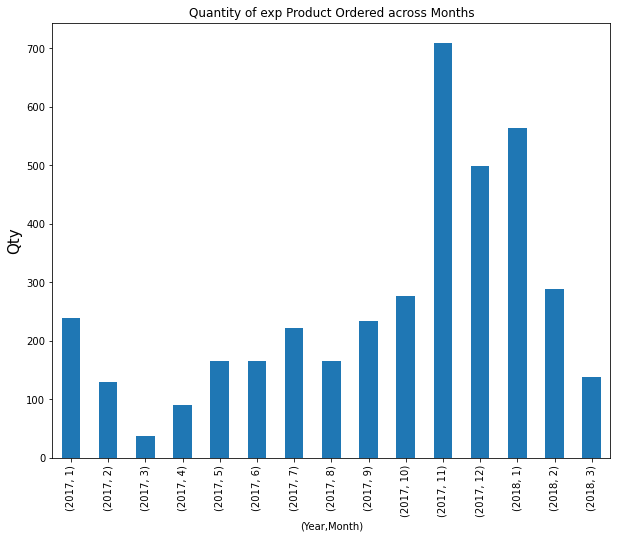

In [30]:
# what is the trend in the ordered product across the months within the time period?

for elem in orders_data.price_categ.value_counts().index:
    orders_data_price_categ = orders_data[orders_data.price_categ == f'{elem}']
    orders_data_price_categ.groupby([orders_data_price_categ.index.year, orders_data_price_categ.index.month])\
                     .qty.sum().plot.bar(figsize=(10,8), xlabel='(Year,Month)', title=f'Quantity of {elem} Product Ordered across Months')
    plt.ylabel('Qty', fontsize=15)
    plt.show();

    The quantity of products based on price category varies across the months in the time period with the final quarters of the year showing substantial quantity of sale. The cheap and very cheap products are have also substantial sale in the first month of the first quarters of the years.
    
    The substantial order volume in the first and fourth quarters is proposed to be due to the special holiday seasons.

In [31]:
# what price category has the most average weighted discount?
weighted_aggregates = (orders_data.assign(ave_disc = orders_data['disc_perc'] * orders_data['qty'], 
                                          actual_revenue = orders_data['total_price'] * orders_data['in_stock'])
                                  .groupby('price_categ').agg({'ave_disc':'mean', 'actual_revenue':'sum'})
                      )
weighted_aggregates

,ave_disc,actual_revenue
price_categ,,
v_cheap,26.016100,44701.57
cheap,27.682041,1361956.83
aff,17.905704,1788804.37
m_exp,10.089692,953448.77
exp,10.648947,2087040.16


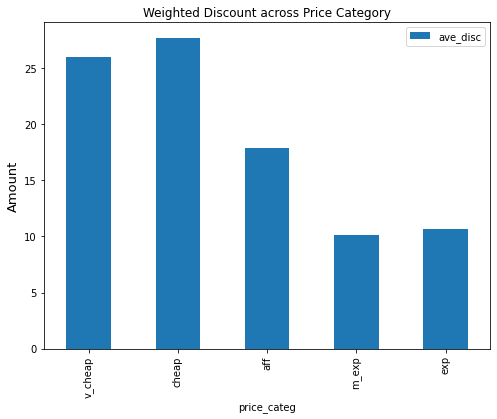

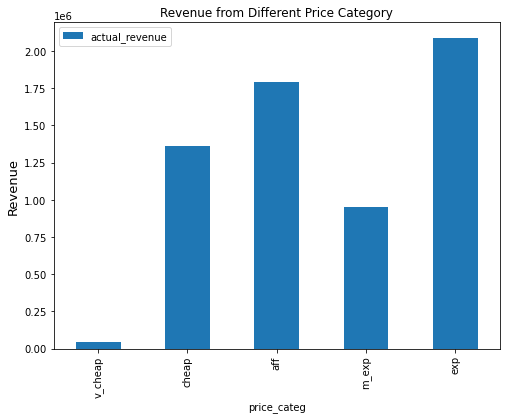

In [32]:
weighted_aggregates[['ave_disc']].plot.bar(figsize=(8,6), title='Weighted Discount across Price Category')
plt.ylabel('Amount', fontsize=13)
plt.show();

weighted_aggregates[['actual_revenue']].plot.bar(figsize=(8,6), title='Revenue from Different Price Category')
plt.ylabel('Revenue', fontsize=13)
plt.show();

    It may be observed that the weighted discounts across categories are highest among the cheapest of products, while the revenue is highest for the expensive and affordable products. It might be better to minimize the discount on the very cheap, cheap and affordable products while keeping the discount or slightly increasing it, on the expensive and moderatively expensive products.

In [33]:
orders_data.head(3)

,order_id,sku,qty,unit_price,total_price,price,name,order_date,brand,desc,in_stock,price_diff,disc_perc,category,subcategory,price_categ
date,,,,,,,,,,,,,,,,
2017-01-01 01:51:00,299545,OWC0100,1,47.49,47.49,60.99,OWC In-line Digital Temperature Sensor Kit HDD...,01/01/2017 01:51,OWC,Kit temperature sensor for HDD iMac 21 inch an...,1,13.50,22.134776,accessories,computer_parts,cheap
2017-01-01 01:57:00,299546,IOT0014,1,18.99,18.99,22.95,iOttie Easy View 2 Car Black Support,01/01/2017 01:57,iOttie,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,0,3.96,17.254902,accessories,iphone_support,cheap
2017-01-01 02:02:00,295347,APP0700,1,72.19,72.19,89.00,Apple 85W MagSafe 2 charger MacBook Pro screen...,01/01/2017 02:02,Apple,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,1,16.81,18.887640,accessories,apple_macbook_charging,cheap


In [51]:
orders_data.groupby(['in_stock', orders_data.index.year])\
           .total_price.sum().to_frame().iloc[2:,].reset_index()\
           .drop('in_stock', axis=1).set_index('date')

,total_price
date,
2017,4520441.67
2018,1715510.03


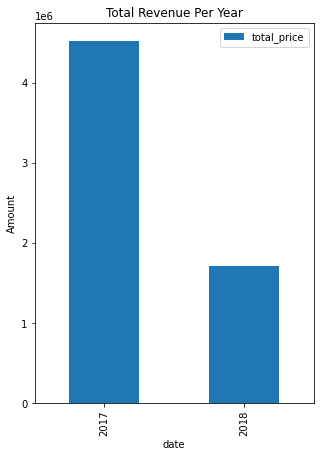

In [34]:
# Revenue per year
orders_data.groupby(['in_stock', orders_data.index.year])\
           .total_price.sum().to_frame().iloc[2:,].reset_index()\
           .drop('in_stock', axis=1).set_index('date').plot.bar(ylabel='Amount', title='Total Revenue Per Year', figsize=(5,7))
plt.show();

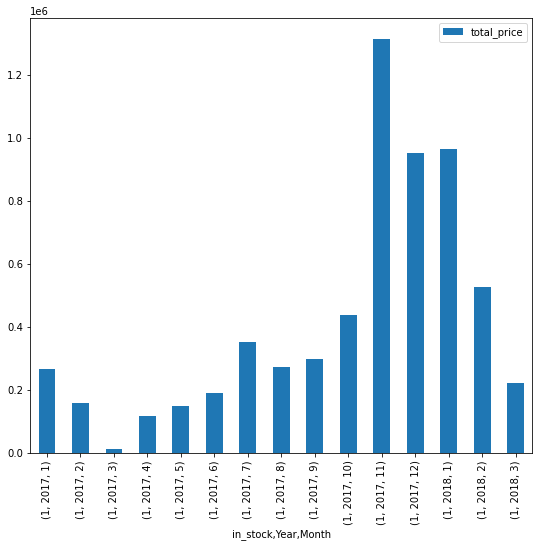

In [35]:
# Revenue per year
orders_data.groupby(['in_stock', orders_data.index.year, orders_data.index.month])\
             .total_price.sum().to_frame().iloc[15:,].plot.bar(figsize=(9,8), xlabel='in_stock,Year,Month')

plt.show();

In [36]:
revenue_per_month = orders_data.groupby(['in_stock', orders_data.index.year])\
                               .total_price.sum().to_frame().iloc[2:,].reset_index()\
                               .drop('in_stock', axis=1)

revenue_per_month['num_of_months'] = [12,3]
revenue_per_month['revenue_per_month'] = revenue_per_month.apply(lambda row: row['total_price']/row['num_of_months'], axis=1)
revenue_per_month

,date,total_price,num_of_months,revenue_per_month
0,2017,4520441.67,12,376703.472500
1,2018,1715510.03,3,571836.676667


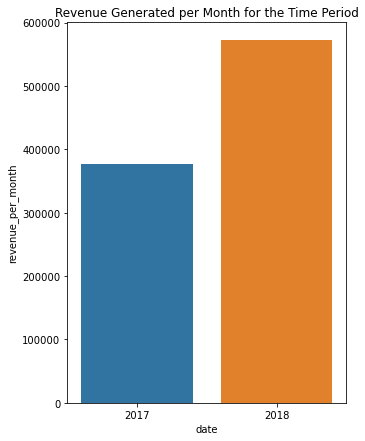

In [37]:
# revenue per month
plt.figure(figsize=(5,7))
sns.barplot(data=revenue_per_month, x='date', y='revenue_per_month')
plt.title('Revenue Generated per Month for the Time Period')
plt.show();

    More revenue is generated per month in the year 2018 compared to the year 2017.

In [38]:
# what product category generated the most revenue
orders_data.groupby(['in_stock', orders_data.index.year, orders_data.category])\
             .total_price.sum().to_frame().iloc[14:,]

total_price
in_stock date category                
1        2017 other          282816.45
              service         97661.03
              spare_parts     72187.22
              tools           13660.26
         2018 accessories    656575.90
              devices        849152.68
              other          156709.70
              service         26703.13
              spare_parts     22263.39
              tools            4105.23

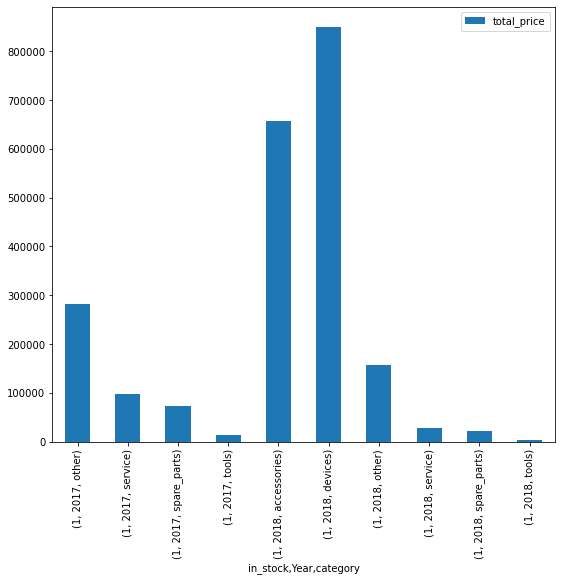

In [39]:
orders_data.groupby(['in_stock', orders_data.index.year, orders_data.category])\
             .total_price.sum().to_frame().iloc[14:,].plot.bar(figsize=(9,8), xlabel='in_stock,Year,category')

plt.show();

    Most revenues are generated from sales of accessories and devices across all the years.

In [40]:
# number of positively discounted products.
disc = orders_data[orders_data['price_diff'] > 0] # discounted products
disc.qty.sum()

63884

In [41]:
# number of negatively discounted products.
ship = orders_data[orders_data['price_diff'] < 0]  # shipped cost included
ship.qty.sum()

2024

In [42]:
# what number of ordered products are discounted?
data1 = []
data2 = []

for x,y,z in zip(orders_data.index.year, orders_data['qty'], orders_data['price_diff']):
    if (y > 1):
        for num in range(0, y):
            data1.append(x)
            data2.append(z)
    else:
        data1.append(x)
        data2.append(z)
        
data2 = pd.DataFrame({'year': data1, 'price_diff': data2})
data2.sort_values(by='price_diff', ascending=False).head()

,year,price_diff
43939,2017,1511.20
19,2017,1468.01
692,2017,1404.01
5515,2017,1404.01
6858,2017,1403.01


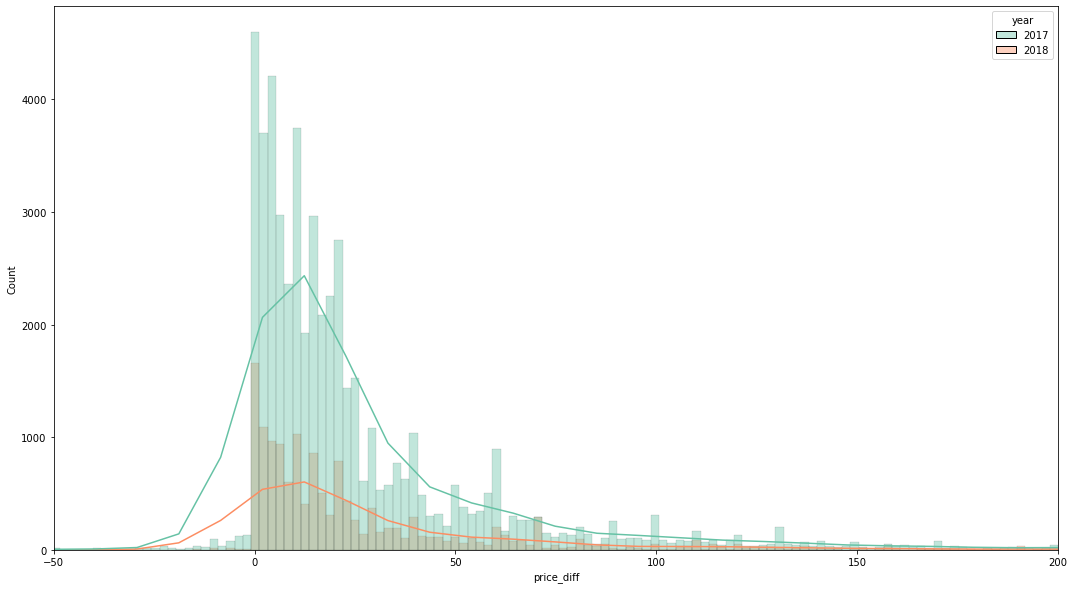

In [43]:
plt.subplots(figsize=(18, 10))

sns.histplot(data=data2, x='price_diff', hue='year', 
             alpha=.4, # add transparency to you chart/legend
             kde=True, # add a density line in the histogram
             bins=1000, # define the number of bins the variable total paid will be grouped
             palette='Set2'
            );

plt.xlim([-50, 200])
plt.show();

    Most products are discounted. Very high discounts are few compared to low discounts. Most discounts are in the range 0 to 50.

In [44]:
prdt_categ.subcategory.nunique()

91

In [45]:
sorted(list(prdt_categ.subcategory.unique()))

['adapters_cables',
 'apple_adapters_cables',
 'apple_airports',
 'apple_battery',
 'apple_headphones',
 'apple_headphones_airpods',
 'apple_headphones_earpods',
 'apple_ipad_cases',
 'apple_ipad_keyboards',
 'apple_ipad_pencils',
 'apple_ipads',
 'apple_iphone_battery_cases',
 'apple_iphone_cases',
 'apple_iphone_charging',
 'apple_iphones',
 'apple_ipods',
 'apple_keyboard',
 'apple_macbook_charging',
 'apple_macbooks',
 'apple_magic_keyboard',
 'apple_magic_mouse',
 'apple_magic_trackpad',
 'apple_mouse',
 'apple_superdrive',
 'applecare_warranty',
 'appletv',
 'appletv_remote',
 'applewatch',
 'applewatch_cases',
 'applewatch_charging',
 'applewatch_straps',
 'cameras',
 'cases',
 'cases_apple_devices',
 'cases_iphone',
 'charging',
 'charging_iphone',
 'computer_parts',
 'computer_parts_memory',
 'dvd',
 'external_battery',
 'flash_drive',
 'gadgets',
 'graphic_display_macbook',
 'graphics_tablet',
 'headphones',
 'headsets',
 'hub',
 'hubs',
 'installation_kit',
 'installation_re

In [46]:
name_concat = ' '.join(sorted(list(prdt_categ.subcategory.unique())))
name_concat

'adapters_cables apple_adapters_cables apple_airports apple_battery apple_headphones apple_headphones_airpods apple_headphones_earpods apple_ipad_cases apple_ipad_keyboards apple_ipad_pencils apple_ipads apple_iphone_battery_cases apple_iphone_cases apple_iphone_charging apple_iphones apple_ipods apple_keyboard apple_macbook_charging apple_macbooks apple_magic_keyboard apple_magic_mouse apple_magic_trackpad apple_mouse apple_superdrive applecare_warranty appletv appletv_remote applewatch applewatch_cases applewatch_charging applewatch_straps cameras cases cases_apple_devices cases_iphone charging charging_iphone computer_parts computer_parts_memory dvd external_battery flash_drive gadgets graphic_display_macbook graphics_tablet headphones headsets hub hubs installation_kit installation_repair ipad_cases iphone_battery iphone_cases iphone_charger iphone_screen iphone_support keyboards lampcharge lighting macbook_battery macbook_cable macbook_cases macbook_stands macbook_support memory m

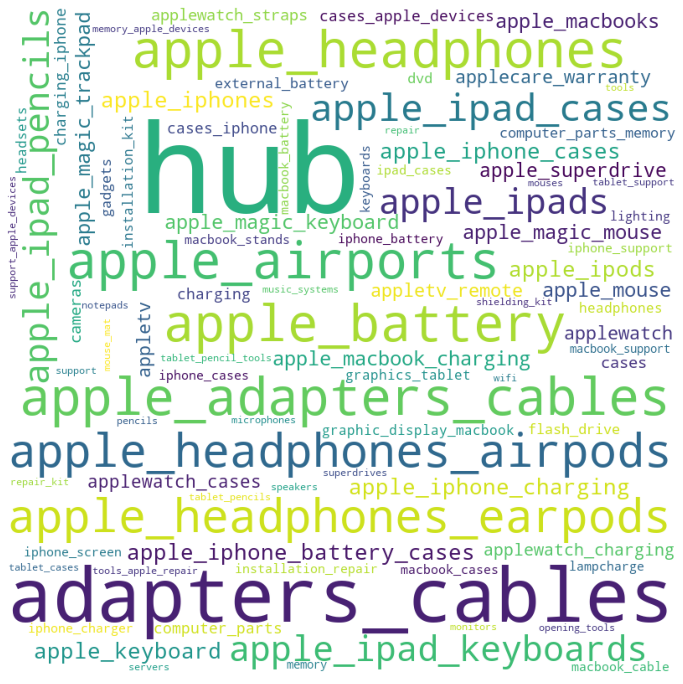

In [47]:
from wordcloud import WordCloud, STOPWORDS

word_cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS).generate(name_concat)
plt.figure(figsize = (12, 15))
plt.imshow(word_cloud)
plt.axis("off");